In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf

print(tf.__version__)

2.10.0


In [2]:
# Get the list of available GPUs
gpu_devices = tf.config.experimental.list_physical_devices('GPU')

# Print the list of available GPUs
print("Available GPUs:", gpu_devices)

# Check if TensorFlow is using GPU
if gpu_devices:
    print("TensorFlow is using GPU.")
    # Specify which GPU to use (assuming you have at least one GPU)
    tf.config.experimental.set_visible_devices(gpu_devices[0], 'GPU')
else:
    print("TensorFlow is NOT using GPU.")

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU.


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [3]:
# load the Fashion MNIST data
data = tf.keras.datasets.fashion_mnist

# Split to training and testing
(training_input, training_label), (testing_input, testing_label) = data.load_data()

# Normalize pixel value
training_input = training_input/255.
testing_input = testing_input/255.

# Build classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training
model.fit(training_input, training_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4986 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3740 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3100 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2945 - accuracy: 0.8905


In [4]:
# evaluate the model
model.evaluate(testing_input, testing_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8751


[0.3490450978279114, 0.8751000165939331]

# Exploration

## No. 1

In [5]:
# predict 
classification = model.predict(testing_input)

# get one predicted data
print(classification[0])

313/313 [==============================] - 1s 2ms/step
[8.7745548e-06 1.7668725e-08 3.3182158e-07 1.8498530e-07 4.1384331e-07
 7.4490882e-02 4.4431331e-06 2.9768761e-02 1.1121161e-05 8.9571506e-01]


In [6]:
# get true label
testing_label[0]

9

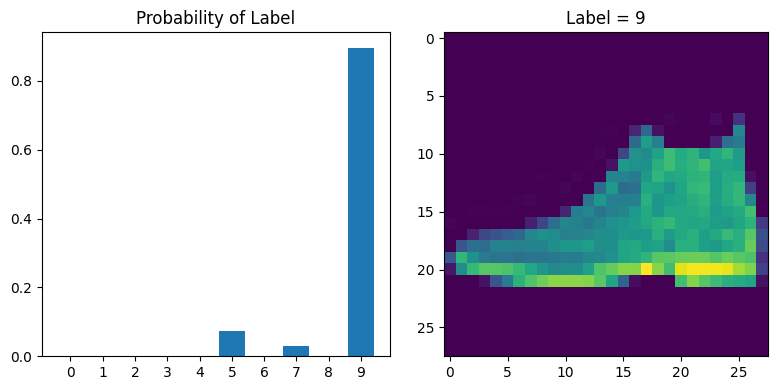

In [7]:
# probability plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Probability of Label")
plt.bar(x=[str(i) for i in range(0, 10)], height=classification[0])

# image plot
plt.subplot(1, 2, 2)
plt.title(f"Label = {testing_label[0]}")
plt.imshow(testing_input[0])

plt.tight_layout()
plt.show()

## No. 2 : Impact of adding neurons

Which one is true?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

In [9]:
# Build classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"), # try to change this value
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training
model.fit(training_input, training_label, epochs=5)

# evaluate model
model.evaluate(testing_input, testing_label)

# predict
classifications = model.predict(testing_input)

print(classifications[0])
print(testing_label[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4729 - accuracy: 0.8318
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3585 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3230 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2989 - accuracy: 0.8896
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[7.8085407e-07 1.9971026e-07 3.8346268e-08 9.7662664e-08 3.4049575e-07
 4.3010241e-03 4.6769146e-06 1.4710814e-01 9.0660853e-07 8.4858382e-01]
9
